### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

from pycaret.classification import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
0,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0
1,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,0
2,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,0
3,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,0
4,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86586,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,0
86587,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,0
86588,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,0
86589,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,0.0,0,0,0.90,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86591 entries, 0 to 86590
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BldgArea        86591 non-null  int64  
 1   BldgDepth       86591 non-null  float64
 2   BuiltFAR        86591 non-null  float64
 3   CommFAR         86591 non-null  float64
 4   FacilFAR        86591 non-null  float64
 5   Lot             86591 non-null  int64  
 6   LotArea         86591 non-null  int64  
 7   LotDepth        86591 non-null  float64
 8   NumBldgs        86591 non-null  int64  
 9   NumFloors       86591 non-null  float64
 10  OfficeArea      86591 non-null  int64  
 11  ResArea         86591 non-null  int64  
 12  ResidFAR        86591 non-null  float64
 13  RetailArea      86591 non-null  int64  
 14  Complaint Type  86591 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 9.9 MB


In [5]:
df.describe(include='all')

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
count,8.659100e+04,86591.000000,86591.000000,86591.000000,86591.000000,86591.000000,8.659100e+04,86591.000000,86591.000000,86591.000000,8.659100e+04,8.659100e+04,86591.000000,86591.000000,86591.000000
mean,8.341031e+03,49.855709,1.143734,0.123250,2.870513,105.260893,9.479385e+03,104.972907,1.224896,2.350154,5.227774e+02,5.891092e+03,1.690055,362.536234,0.116848
std,6.625799e+04,30.325272,1.810324,0.561512,1.597633,426.684680,2.992482e+05,63.283144,1.947582,1.441622,1.218634e+04,5.752111e+04,1.304745,5001.922740,0.321241
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.665000e+03,35.000000,0.590000,0.000000,2.000000,20.000000,2.200000e+03,95.000000,1.000000,2.000000,0.000000e+00,1.215000e+03,0.900000,0.000000,0.000000
50%,2.280000e+03,45.000000,0.880000,0.000000,2.000000,41.000000,2.512000e+03,100.000000,1.000000,2.000000,0.000000e+00,1.816000e+03,1.100000,0.000000,0.000000
75%,3.321000e+03,56.000000,1.270000,0.000000,4.800000,72.000000,4.200000e+03,102.070000,1.000000,3.000000,0.000000e+00,2.650000e+03,2.430000,0.000000,0.000000
max,1.354011e+07,1300.000000,259.800000,9.000000,10.000000,7505.000000,7.425000e+07,8000.000000,251.000000,44.000000,1.311800e+06,1.321140e+07,10.000000,598908.000000,1.000000


In [6]:
df.shape

(86591, 15)

In [7]:
df.columns

Index(['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'Complaint Type'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

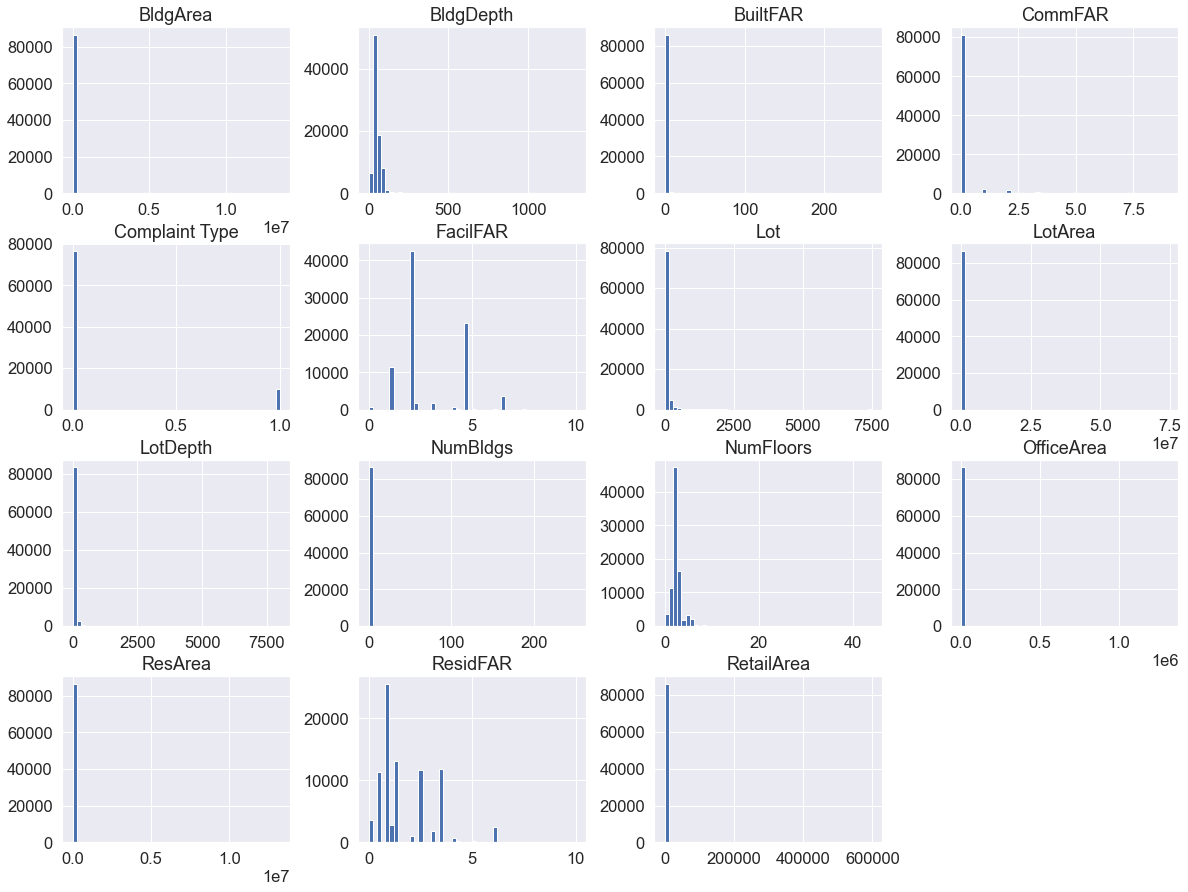

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
df.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
BldgArea,1.000000,0.252848,0.281482,0.042521,0.094024,0.073404,0.171596,0.267843,0.538966,0.362131,0.230615,0.891821,0.086504,0.166135,-0.020753
BldgDepth,0.252848,1.000000,0.268993,0.189929,0.280596,-0.005369,0.030599,0.272519,0.064160,0.376513,0.194307,0.140357,0.229939,0.205707,-0.030921
BuiltFAR,0.281482,0.268993,1.000000,0.029214,0.257845,0.108804,-0.004657,-0.009419,0.082615,0.443218,0.042184,0.273030,0.267476,0.344289,-0.054390
CommFAR,0.042521,0.189929,0.029214,1.000000,0.223608,0.004799,0.010342,0.089788,-0.007146,-0.055961,0.052676,-0.008567,0.063574,0.135974,0.017182
FacilFAR,0.094024,0.280596,0.257845,0.223608,1.000000,-0.030033,-0.010567,-0.008923,-0.036120,0.289399,0.042132,0.081254,0.850971,0.079556,-0.126373
Lot,0.073404,-0.005369,0.108804,0.004799,-0.030033,1.000000,0.007249,0.034591,0.109160,0.095773,0.020729,0.067332,-0.016693,0.082149,-0.037404
LotArea,0.171596,0.030599,-0.004657,0.010342,-0.010567,0.007249,1.000000,0.340088,0.334775,0.027275,0.078878,0.074994,-0.010638,0.016579,-0.003207
LotDepth,0.267843,0.272519,-0.009419,0.089788,-0.008923,0.034591,0.340088,1.000000,0.223923,0.104540,0.190912,0.153990,-0.022925,0.108172,-0.004633
NumBldgs,0.538966,0.064160,0.082615,-0.007146,-0.036120,0.109160,0.334775,0.223923,1.000000,0.082019,0.068764,0.454090,-0.040549,0.047743,0.006968
NumFloors,0.362131,0.376513,0.443218,-0.055961,0.289399,0.095773,0.027275,0.104540,0.082019,1.000000,0.070678,0.365225,0.332354,0.025318,-0.061109


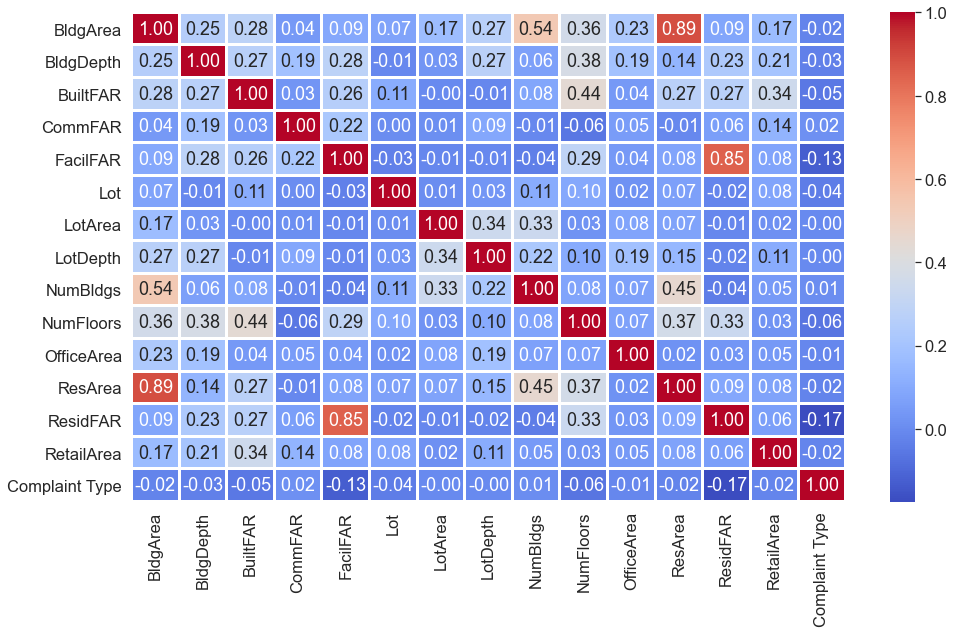

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

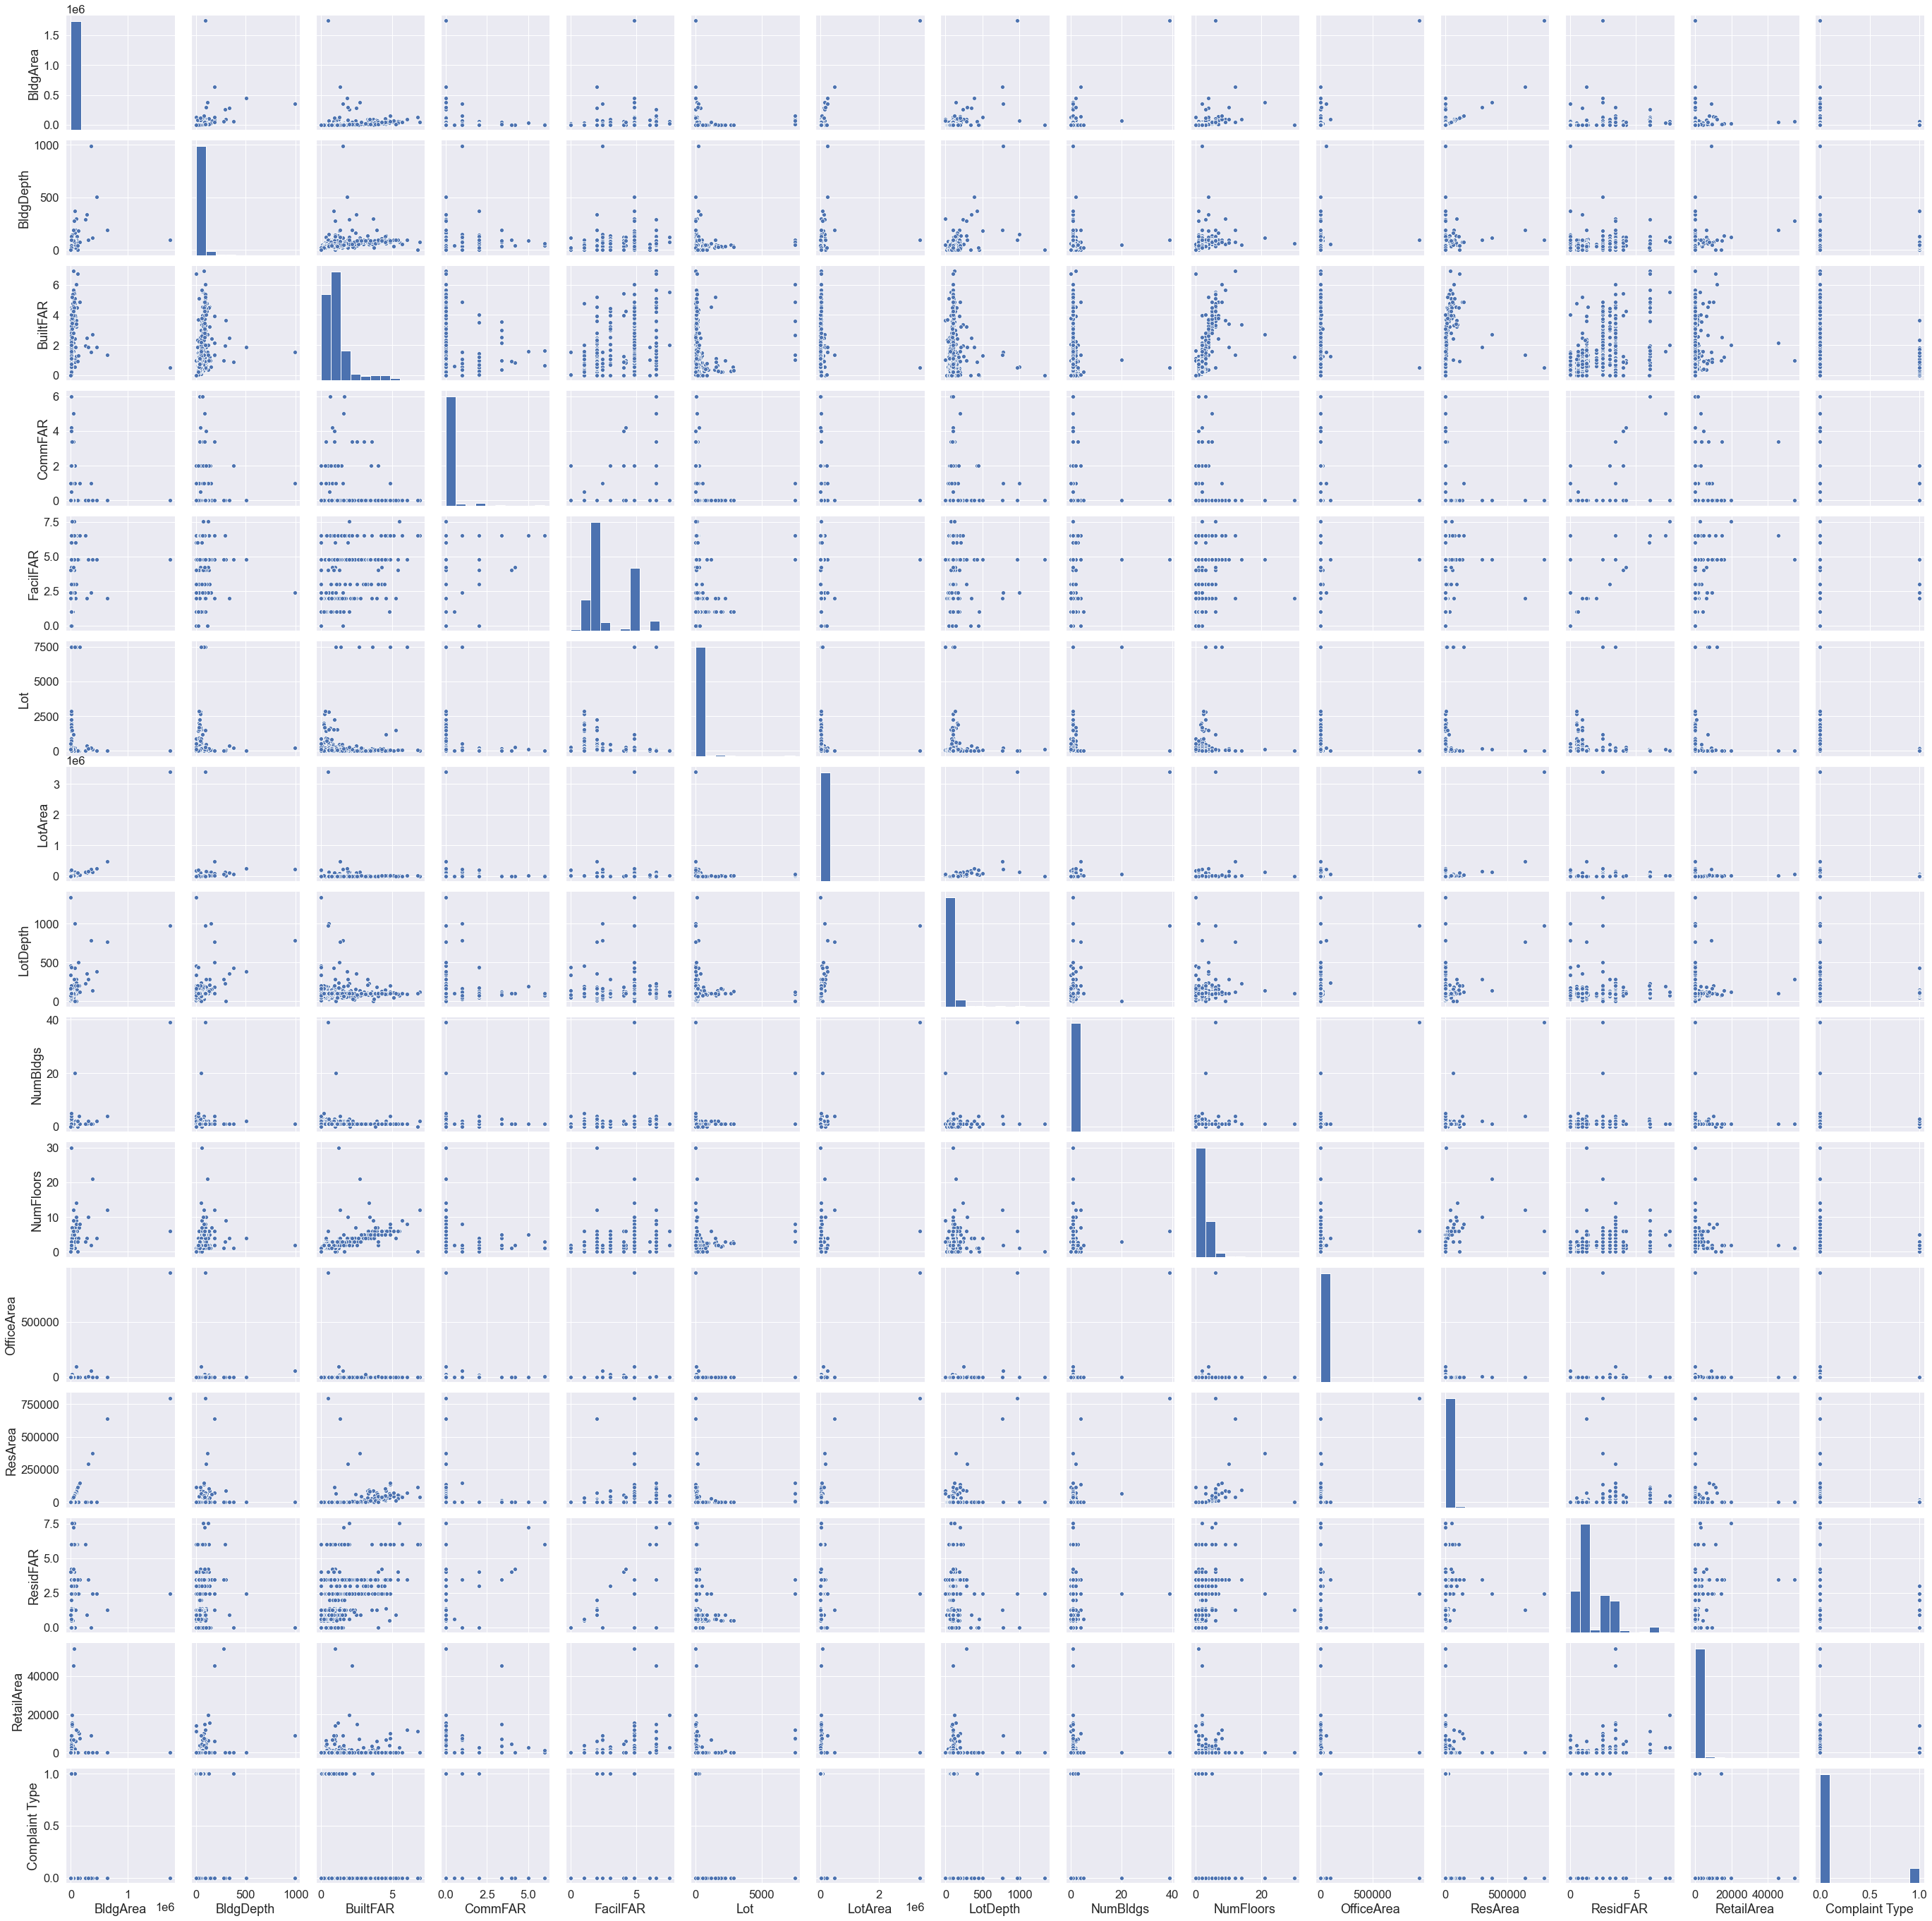

In [11]:
sns.pairplot(df.sample(1000))
plt.show()

### Data Preprocessing

### Treat Missing Values

In [12]:
df.isnull().sum()

BldgArea          0
BldgDepth         0
BuiltFAR          0
CommFAR           0
FacilFAR          0
Lot               0
LotArea           0
LotDepth          0
NumBldgs          0
NumFloors         0
OfficeArea        0
ResArea           0
ResidFAR          0
RetailArea        0
Complaint Type    0
dtype: int64

### Treat Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

326

In [14]:
df[df.duplicated(keep=False)]

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
15,0,0.0,0.00,2.0,3.0,22,2500,100.0,0,0.0,0,0,3.00,0,0
135,0,0.0,0.00,0.0,4.8,4,2500,100.0,0,0.0,0,0,2.43,0,0
140,2500,100.0,1.00,0.0,4.8,9,2500,100.0,1,1.0,0,0,2.43,2500,0
150,0,0.0,0.00,0.0,4.8,22,2500,100.0,0,0.0,0,0,2.43,0,0
329,0,0.0,0.00,0.0,0.0,31,2500,100.0,0,0.0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81245,1998,37.0,1.11,0.0,1.0,53,1800,100.0,1,3.0,0,1998,0.60,0,0
81246,1998,37.0,1.11,0.0,1.0,54,1800,100.0,1,3.0,0,1998,0.60,0,0
81247,1998,37.0,1.11,0.0,1.0,55,1800,100.0,1,3.0,0,1998,0.60,0,0
81272,1998,37.0,1.11,0.0,1.0,12,1800,100.0,1,3.0,0,1998,0.60,0,0


In [15]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [16]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type
0,0,0.00,0.00,5.0,6.5,1,15000,200.00,1,0.0,0,0,6.02,0,0
1,752,16.00,0.05,5.0,6.5,4,13770,100.00,2,1.0,272,0,6.02,0,0
2,39375,200.00,1.13,5.0,6.5,10,35000,200.00,1,2.0,0,0,6.02,0,0
3,12500,85.00,5.00,5.0,6.5,17,2500,100.00,1,5.0,0,12500,6.02,0,0
4,8595,70.00,4.58,5.0,6.5,18,1875,75.00,1,5.0,0,6876,6.02,1719,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86260,1044,29.00,0.55,0.0,2.0,877,1900,76.00,1,2.0,0,1044,0.90,0,0
86261,237021,35.00,0.13,0.0,2.0,1,1845000,2000.00,20,12.0,0,0,0.90,0,0
86262,83366,121.75,0.32,0.0,2.0,10,257775,235.25,2,3.0,0,0,0.90,0,0
86263,0,0.00,0.00,0.0,2.0,43,14749,439.17,0,0.0,0,0,0.90,0,0


### Model Training

### Using PyCaret

In [17]:
exp_class = setup(data = df, target = 'Complaint Type', session_id=123, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(86265, 15)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.925500,0.928800,0.448100,0.843100,0.584500,0.547800
1,Random Forest Classifier,0.924100,0.900500,0.455500,0.815900,0.584400,0.546300
2,CatBoost Classifier,0.921700,0.918900,0.408800,0.841600,0.550000,0.512700
3,Light Gradient Boosting Machine,0.919500,0.916300,0.385000,0.843500,0.528200,0.490800
4,Gradient Boosting Classifier,0.903500,0.877100,0.206200,0.876300,0.333700,0.302500
5,Decision Tree Classifier,0.900900,0.772300,0.604400,0.573100,0.588200,0.531900
6,Extreme Gradient Boosting,0.899900,0.872900,0.168900,0.879200,0.283200,0.255100
7,K Neighbors Classifier,0.897500,0.826300,0.400300,0.593200,0.477900,0.423500
8,Ada Boost Classifier,0.892400,0.853500,0.125600,0.739600,0.214500,0.187000
9,SVM - Linear Kernel,0.882800,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
etc = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9281,0.9329,0.4455,0.8824,0.5921,0.5573
1,0.9238,0.9338,0.4346,0.8381,0.5724,0.5351
2,0.9221,0.9196,0.4123,0.8434,0.5539,0.5166
3,0.9238,0.9221,0.4494,0.8198,0.5805,0.5425
4,0.9278,0.9367,0.5037,0.8095,0.6210,0.5835
5,0.9243,0.9238,0.4332,0.8454,0.5728,0.5360
6,0.9255,0.9300,0.4431,0.8483,0.5821,0.5456
7,0.9284,0.9274,0.4802,0.8398,0.6110,0.5748
8,0.9307,0.9289,0.4703,0.8837,0.6139,0.5797
9,0.9203,0.9331,0.4084,0.8209,0.5455,0.5071


In [20]:
print(etc)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [21]:
tuned_etc = tune_model('et', optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9281,0.9350,0.4554,0.8679,0.5974,0.5621
1,0.9244,0.9349,0.4370,0.8429,0.5756,0.5386
2,0.9209,0.9261,0.4123,0.8267,0.5502,0.5121
3,0.9241,0.9252,0.4519,0.8206,0.5828,0.5449
4,0.9276,0.9376,0.4938,0.8163,0.6154,0.5781
5,0.9238,0.9255,0.4282,0.8439,0.5681,0.5312
6,0.9249,0.9311,0.4356,0.8502,0.5761,0.5396
7,0.9284,0.9279,0.4777,0.8428,0.6098,0.5737
8,0.9296,0.9294,0.4728,0.8643,0.6112,0.5761
9,0.9217,0.9348,0.4183,0.8284,0.5559,0.5180


In [22]:
print(tuned_etc)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=60, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=175,
                     n_jobs=None, oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


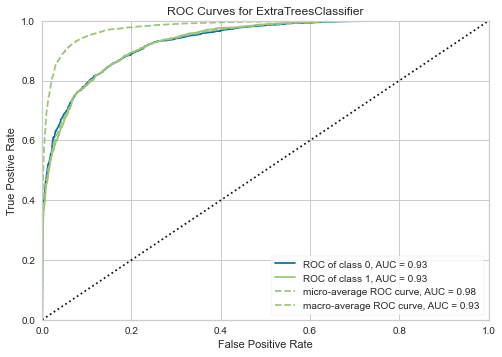

In [23]:
plot_model(tuned_etc)

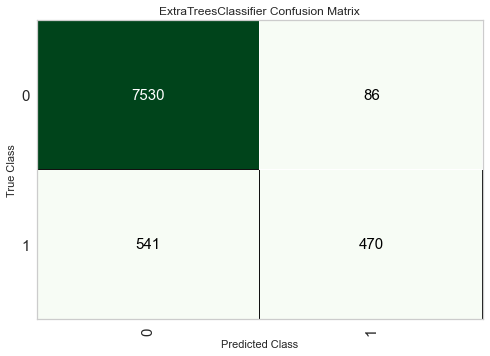

In [24]:
plot_model(tuned_etc, plot = 'confusion_matrix')

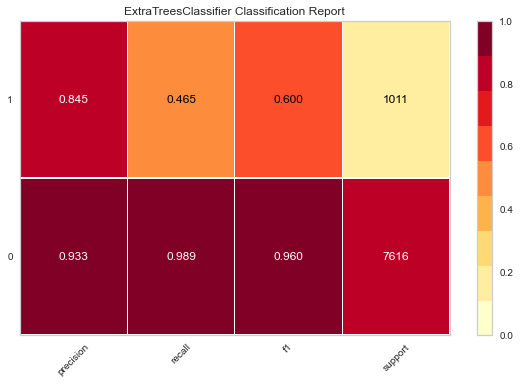

In [25]:
plot_model(tuned_etc, plot='class_report')

In [26]:
evaluate_model(tuned_etc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(tuned_etc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9273,0.9342,0.4649,0.8453,0.5999,0.5636


,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Complaint Type,Label,Score
0,-0.009349,1.256276,-0.493400,-0.219807,-0.543857,-0.132090,0.071486,1.335621,-0.115805,-0.936723,-0.042980,-0.102484,-0.604784,-0.072574,1,0,0.1886
1,-0.097386,0.003903,-0.267307,-0.219807,-1.169758,0.656274,-0.022033,-0.078719,-0.115805,-0.243743,-0.042980,-0.069515,-0.834554,-0.072574,0,0,0.0000
2,-0.105039,-0.325670,-0.184590,-0.219807,1.208665,-0.050212,-0.025985,-0.310105,-0.115805,-0.243743,-0.042980,-0.078330,0.567044,-0.072574,0,0,0.0000
3,-0.099540,-0.062012,-0.134960,-0.219807,-0.543857,-0.015122,-0.025175,-0.208844,-0.115805,-0.936723,-0.042980,-0.085063,-0.604784,-0.072574,0,0,0.0857
4,3.671820,7.254487,1.888848,-0.219807,2.272696,-0.036176,0.152474,2.671886,-0.115805,2.528175,0.219117,4.216639,3.316629,-0.072574,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,-0.105762,-0.391584,-0.355538,-0.219807,-0.543857,-0.206949,-0.022700,-0.078719,-0.115805,0.102746,-0.042980,-0.079163,-0.604784,-0.072574,1,0,0.3429
8623,-0.102869,-0.556370,-0.184590,-0.219807,1.208665,0.106525,-0.025342,0.349826,-0.115805,0.449236,-0.042980,-0.075831,0.567044,-0.072574,0,0,0.0514
8624,-0.091661,-0.391584,-0.002613,-0.219807,1.208665,0.146294,-0.025035,-0.082189,-0.115805,-0.243743,-0.042980,-0.062921,0.567044,-0.072574,0,0,0.0000
8625,-0.103728,-0.193841,-0.289365,-0.219807,-0.543857,-0.190574,-0.023784,-0.157583,0.396761,-0.243743,-0.042980,-0.076820,-0.604784,-0.072574,1,0,0.3571
